# Convolutional Neural Networks with sophisticated images

## Getting the dataset


In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-04-14 10:46:27--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 74.125.203.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  80.9MB/s    in 0.8s    

2021-04-14 10:46:28 (80.9 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os # use the OS library to use Operating System libraries,
import zipfile #zipfile library allowing you to unzip the data.

local_zip = '/tmp/cats_and_dogs_filtered.zip' # directoory for zipfiles

zip_ref = zipfile.ZipFile(local_zip , 'r') # reading the zipfile 
zip_ref.extractall('/tmp')
zip_ref.close()


## Giving directories to data 

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir ,'train')
validation_dir = os.path.join(base_dir , 'validation')

train_cats_dir = os.path.join(train_dir , 'cats')
train_dogs_dir = os.path.join(train_dir , 'dogs')
 

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir , 'dogs')



## Converting the train and test inot python dictionaries 

In [ ]:
train_cat_frames = os.listdir(train_cats_dir)
train_dog_frames = os.listdir(train_dogs_dir)


## Printing the ten pics

In [ ]:
print(train_cat_frames[:10])
print(train_dog_frames[:10])

['cat.856.jpg', 'cat.877.jpg', 'cat.800.jpg', 'cat.252.jpg', 'cat.926.jpg', 'cat.105.jpg', 'cat.465.jpg', 'cat.555.jpg', 'cat.617.jpg', 'cat.970.jpg']
['dog.346.jpg', 'dog.767.jpg', 'dog.536.jpg', 'dog.997.jpg', 'dog.169.jpg', 'dog.887.jpg', 'dog.244.jpg', 'dog.903.jpg', 'dog.937.jpg', 'dog.470.jpg']


## Sowing the total number of images in train and test

In [ ]:
print("total training cats ",len(os. listdir(train_cats_dir)))
print("toatal training dogs " , len(os.listdir(train_dogs_dir)))

print("toatal test cats " , len(os.listdir(validation_cats_dir)))
print('total test dogs' , len(os.listdir(validation_dogs_dir)))

total training cats  1000
toatal training dogs  1000
toatal test cats  500
total test dogs 500


## Configuring the matplotlib parameters


In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4 
pic_index = 0  # The pics will pick from the above index 


##  display a batch of 8 cat and 8 dog pictures 

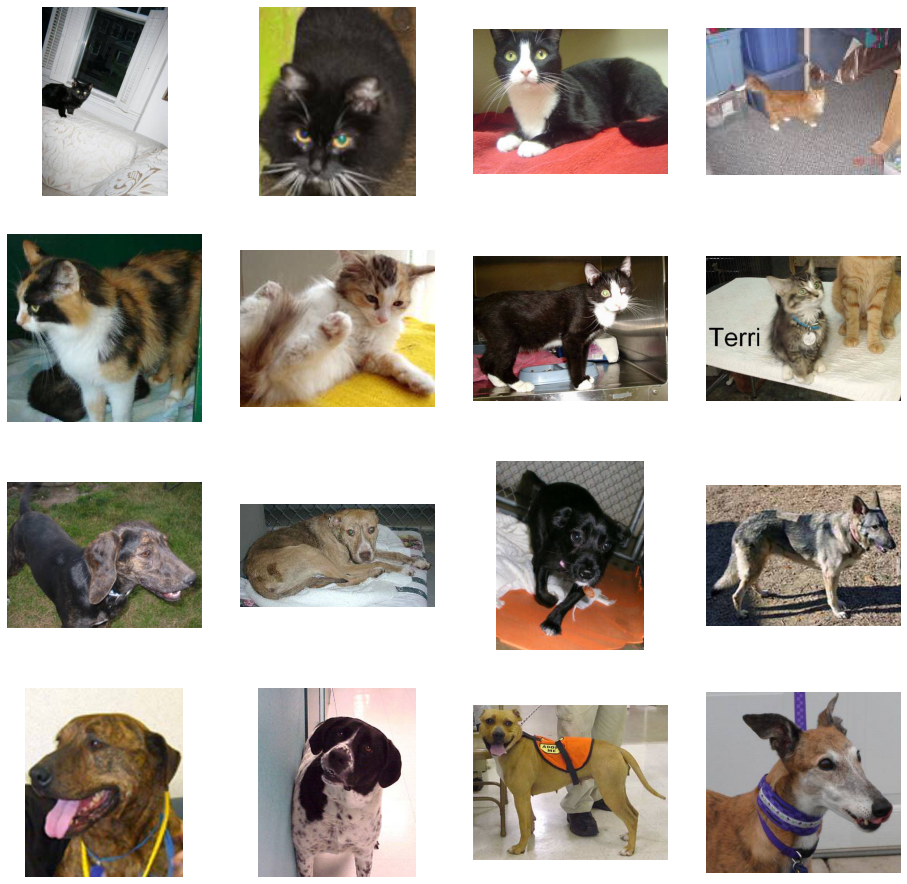

In [ ]:
fig = plt.gcf() # get current by figure 
fig.set_size_inches(ncols * 4 , nrows * 4 ) # fit the size 4x4 

pic_index+=8 

next_cat_pix = [ os.path.join(train_cats_dir , fname)
                 for fname in train_cat_frames[pic_index-8:pic_index]
                ]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_frames[ pic_index-8: pic_index]
                ]

for i , img_path in enumerate(next_cat_pix + next_dog_pix ):
  sp = plt.subplot (nrows, ncols , i +1 )
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf


In [ ]:
model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(16, (3,3) , activation ='relu', input_shape=(150,150,3)),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(32,(3,3) , activation = 'relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(64, (3,3) , activation = 'relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dense(1,activation='sigmoid')
     
     
     ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale= 1./255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,class_mode='binary',
                                                    target_size=(150,150))

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150,150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
fiting = model.fit(train_generator,
                   validation_data= validation_generator,
                   steps_per_epoch=100,
                   epochs=15,
                   validation_steps=50,
                   verbose=2)

Epoch 1/15
100/100 - 40s - loss: 0.7098 - accuracy: 0.5940 - val_loss: 0.6169 - val_accuracy: 0.6570
Epoch 2/15
100/100 - 10s - loss: 0.5741 - accuracy: 0.7060 - val_loss: 0.6485 - val_accuracy: 0.6590
Epoch 3/15
100/100 - 10s - loss: 0.4988 - accuracy: 0.7520 - val_loss: 0.5624 - val_accuracy: 0.7210
Epoch 4/15
100/100 - 10s - loss: 0.4208 - accuracy: 0.8070 - val_loss: 0.6387 - val_accuracy: 0.6790
Epoch 5/15
100/100 - 10s - loss: 0.3291 - accuracy: 0.8540 - val_loss: 0.5848 - val_accuracy: 0.7290
Epoch 6/15
100/100 - 10s - loss: 0.2511 - accuracy: 0.8930 - val_loss: 0.6414 - val_accuracy: 0.7110
Epoch 7/15
100/100 - 10s - loss: 0.1801 - accuracy: 0.9290 - val_loss: 0.7706 - val_accuracy: 0.7120
Epoch 8/15
100/100 - 10s - loss: 0.1253 - accuracy: 0.9570 - val_loss: 1.0555 - val_accuracy: 0.7070
Epoch 9/15
100/100 - 10s - loss: 0.1039 - accuracy: 0.9660 - val_loss: 1.1189 - val_accuracy: 0.7400
Epoch 10/15
100/100 - 10s - loss: 0.0645 - accuracy: 0.9785 - val_loss: 1.0372 - val_accura

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
  
 

Saving chartered-accountant-in-delhi-ca-in-delhi-500x500.jpeg to chartered-accountant-in-delhi-ca-in-delhi-500x500 (2).jpeg
[1.]
chartered-accountant-in-delhi-ca-in-delhi-500x500.jpeg is a dog
